# <p style="background-color:maroon; font-family:calibri; color:white; font-size:180%; text-align:center; border-radius:0px 0px;">**COGNIFYZ DATA SCIENCE PROJECT**</p>

# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 1 | Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, root_mean_squared_error, mean_absolute_error

# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 2 | Read Dataset</p>

In [2]:
# Read the dataset

df = pd.read_csv("Dataset.csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 3 | Exploratory Data Analysis (EDA)</p>

In [3]:
# Descriptive statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [4]:
# Description of the Categorical features

df.describe(include='object').T

,count,unique,top,freq
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Dilli Haat, INA, New Delhi",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9542,1825,North Indian,936
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517


In [5]:
# Check for missing values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

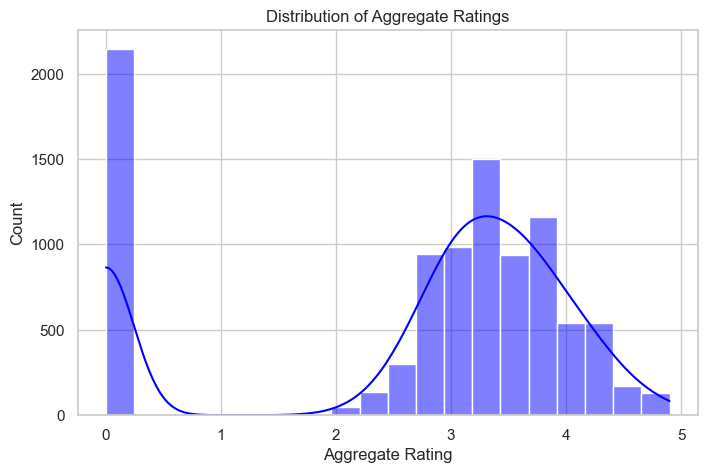

In [7]:
# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of Aggregate Ratings

plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()


C:\Users\Mallikarjun B Patil\AppData\Local\Temp\ipykernel_16660\3168815772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='coolwarm')


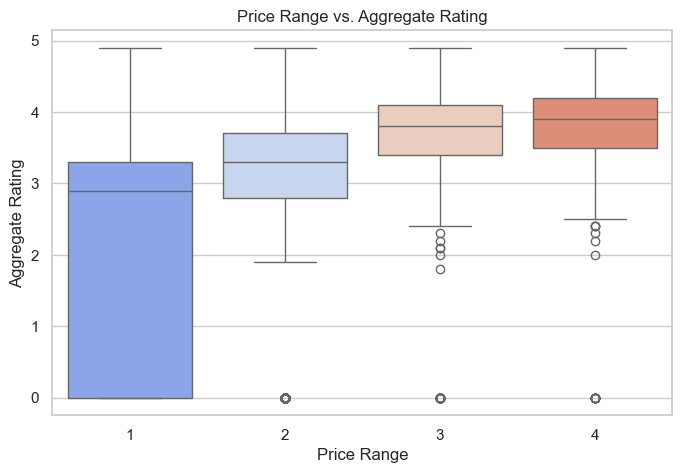

In [8]:
# 2. Price Range vs. Aggregate Rating

plt.figure(figsize=(8, 5))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='coolwarm')
plt.title("Price Range vs. Aggregate Rating")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.show()

C:\Users\Mallikarjun B Patil\AppData\Local\Temp\ipykernel_16660\430052519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='viridis')


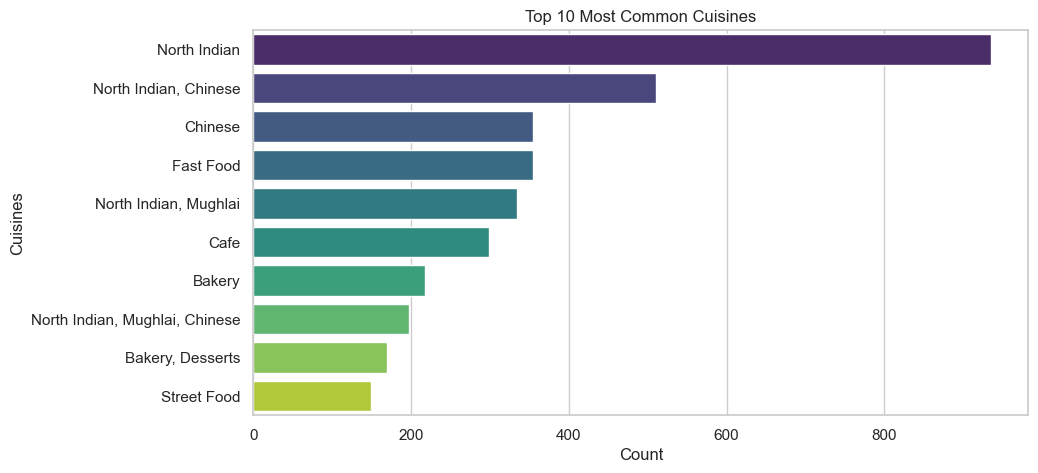

In [9]:
# 3. Top 10 Most Common Cuisines

plt.figure(figsize=(10, 5))
cuisine_counts = df['Cuisines'].value_counts().nlargest(10)
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette='viridis')
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisines")
plt.show()

C:\Users\Mallikarjun B Patil\AppData\Local\Temp\ipykernel_16660\611150356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')


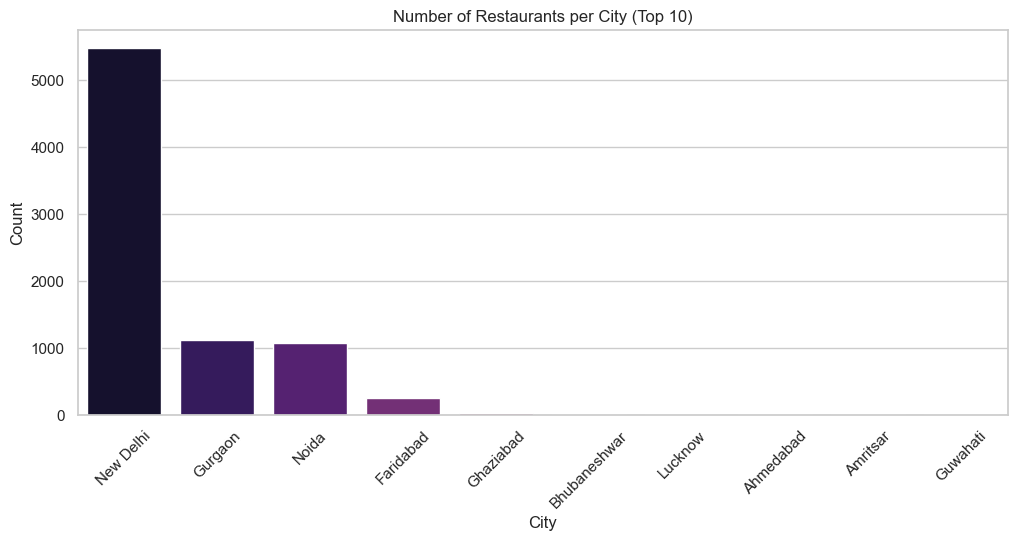

In [10]:
# 4. Number of Restaurants per City (Top 10 Cities)

plt.figure(figsize=(12, 5))
city_counts = df['City'].value_counts().nlargest(10)
sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')
plt.xticks(rotation=45)
plt.title("Number of Restaurants per City (Top 10)")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

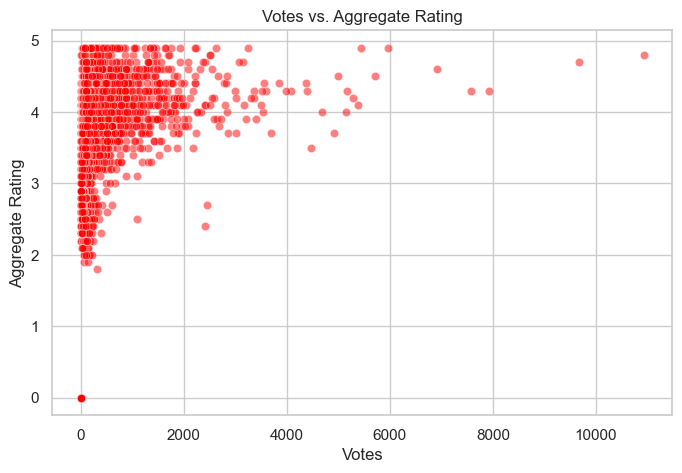

In [11]:
# 5. Scatter Plot of Votes vs. Aggregate Rating

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.5, color='red')
plt.title("Votes vs. Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.show()

# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 4 | Data Preprocessing</p>

In [12]:
# Feature Engineering on the dataset

df["Currency"].value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Rand(R)                     60
Emirati Diram(AED)          60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

In [13]:
# Define conversion rates to INR

conversion_rates = {
    'Dollar($)': 74.85,
    'Pounds(£)': 103.85,
    'Brazilian Real(R$)': 13.85,
    'Rand(R)': 4.75,
    'Emirati Diram(AED)': 20.35,
    'NewZealand($)': 65.85,
    'Turkish Lira(TL)': 8.85,
    'Botswana Pula(P)': 6.75,
    'Indonesian Rupiah(IDR)': 0.0055,
    'Qatari Rial(QR)': 20.55,
    'Sri Lankan Rupee(LKR)': 0.35,
}

# Apply the conversion

df['Average Cost for two (INR)'] = df['Average Cost for two'] * df['Currency'].map(conversion_rates).fillna(1)
df[['Restaurant Name', 'Currency', 'Average Cost for two', 'Average Cost for two (INR)']]


,Restaurant Name,Currency,Average Cost for two,Average Cost for two (INR)
0,Le Petit Souffle,Botswana Pula(P),1100,7425.00
1,Izakaya Kikufuji,Botswana Pula(P),1200,8100.00
2,Heat - Edsa Shangri-La,Botswana Pula(P),4000,27000.00
3,Ooma,Botswana Pula(P),1500,10125.00
4,Sambo Kojin,Botswana Pula(P),1500,10125.00
...,...,...,...,...
9546,Naml۱ Gurme,Turkish Lira(TL),80,708.00
9547,Ceviz A��ac۱,Turkish Lira(TL),105,929.25
9548,Huqqa,Turkish Lira(TL),170,1504.50
9549,A���k Kahve,Turkish Lira(TL),120,1062.00


In [14]:
# Check for the value counts of the Cuisines

df["Cuisines"].value_counts()


Cuisines
North Indian                       936
North Indian, Chinese              511
Chinese                            354
Fast Food                          354
North Indian, Mughlai              334
                                  ... 
Kebab, Izgara                        1
World Cuisine                        1
World Cuisine, Mexican, Italian      1
Kebab, Turkish Pizza, D�_ner         1
Turkish Pizza                        1
Name: count, Length: 1825, dtype: int64

In [15]:
# Fill the missing values in the Cuisines column with the most common cuisine

df["Cuisines"] = df["Cuisines"].fillna("North Indian")

In [16]:
# Drop the unnecessary records from the dataset

df = df[df["Aggregate rating"] != 0.00].reset_index(drop=True)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for two (INR)
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,7425.00
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,8100.00
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,27000.00
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,10125.00
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,10125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,708.00
7399,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,929.25
7400,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,1504.50
7401,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,1062.00


In [17]:
# Drop the unnecessary columns from the dataset

df.drop(['Average Cost for two', 'Currency'], axis=1, inplace=True)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for two (INR)
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Yes,No,No,No,3,4.8,Dark Green,Excellent,314,7425.00
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,8100.00
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Yes,No,No,No,4,4.4,Green,Very Good,270,27000.00
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",No,No,No,No,4,4.9,Dark Green,Excellent,365,10125.00
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Yes,No,No,No,4,4.8,Dark Green,Excellent,229,10125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,No,No,No,No,3,4.1,Green,Very Good,788,708.00
7399,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",No,No,No,No,3,4.2,Green,Very Good,1034,929.25
7400,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",No,No,No,No,4,3.7,Yellow,Good,661,1504.50
7401,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,No,No,No,No,4,4.0,Green,Very Good,901,1062.00


In [18]:
# Convert the Categorical Features to Numerical Features using Label Encoding

cat_columns = df.columns[df.dtypes == 'object']

le = LabelEncoder()
for cat in cat_columns:
    df[cat] = le.fit_transform(df[cat])
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost for two (INR)
0,6317637,2843,162,73,6790,168,169,121.027535,14.565443,870,1,0,0,0,3,4.8,0,1,314,7425.00
1,6304287,2421,162,73,4892,581,589,121.014101,14.553708,1053,1,0,0,0,3,4.5,0,1,591,8100.00
2,6300002,2212,162,75,3840,303,309,121.056831,14.581404,1577,1,0,0,0,4,4.4,1,4,270,27000.00
3,6318506,3585,162,75,6794,843,856,121.056475,14.585318,1068,0,0,0,0,4,4.9,0,1,365,10125.00
4,6314302,4218,162,75,6793,843,856,121.057508,14.584450,1064,1,0,0,0,4,4.8,0,1,229,10125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,5915730,3383,208,140,4802,506,512,28.977392,41.022793,1704,0,0,0,0,3,4.1,1,4,788,708.00
7399,5908749,1019,208,140,4820,540,546,29.041297,41.009847,1714,0,0,0,0,3,4.2,1,4,1034,929.25
7400,5915807,2339,208,140,4823,542,549,29.034640,41.055817,1052,0,0,0,0,4,3.7,4,2,661,1504.50
7401,5916112,371,208,140,4824,542,549,29.036019,41.057979,1563,0,0,0,0,4,4.0,1,4,901,1062.00


In [19]:
# Scale features (critical for KNN distance calculations)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 5 | Data Splitting</p>

In [20]:
# Split the dataset into Features and Target

x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [21]:
# Split the dataset into Training and Testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 6 | Model Development</p>

In [22]:
# Build the Linear Regression Model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
# Find out the best parameters for the model

param_grid = {
    "fit_intercept": [True, False]  # Whether to calculate the intercept for the model
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [24]:
# Find the best parameters

best_parameter = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameter)
print("Best Score:", best_score)

Best Parameters: {'fit_intercept': True}
Best Score: 0.5564489737973818


In [25]:
# Fit the model with the best parameters

model = LinearRegression(**best_parameter)
model.fit(x_train, y_train)

LinearRegression()

# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 7 | Model Evaluation</p>

In [26]:
# Predict the target values

y_pred = model.predict(x_test)
y_pred

array([3.03578145, 3.49489551, 2.98904458, ..., 3.36815993, 3.22197734,
       3.23916441])

In [27]:
# Evaluate the model using the metrics

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#acc = accuracy_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')
#print(f'Accuracy: {acc}')

Mean Squared Error: 0.13076715582079596
Root Mean Squared Error: 0.3616174163681776
Mean Absolute Error: 0.26356962320995353
R2 Score: 0.577189142966861


# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 8 | Model Interpretation and Visualization</p>

In [28]:
# Print the coefficients (slopes) for each feature to understand their impact on the house price
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
Restaurant ID: 0.00
Restaurant Name: -0.00
Country Code: 0.00
City: -0.00
Address: 0.00
Locality: -0.00
Locality Verbose: -0.00
Longitude: -0.00
Latitude: -0.00
Cuisines: -0.00
Has Table booking: -0.02
Has Online delivery: -0.04
Is delivering now: -0.05
Switch to order menu: 0.00
Price range: 0.08
Rating color: -0.04
Rating text: 0.18
Votes: 0.00
Average Cost for two (INR): 0.00
Intercept: 3.32


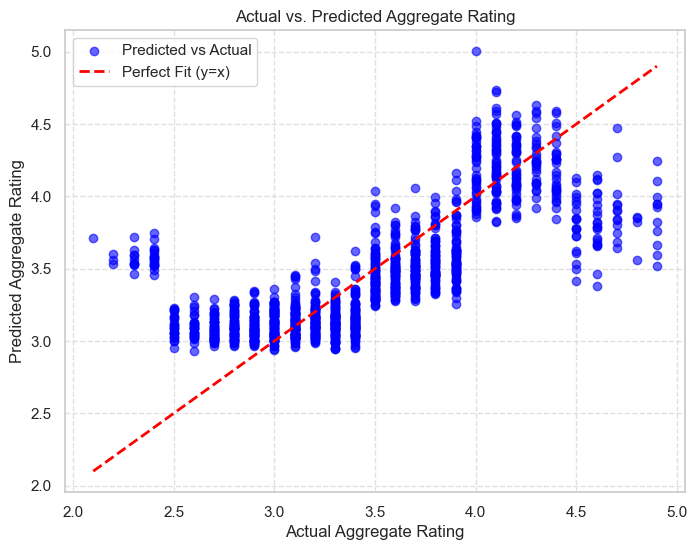

In [29]:
# Plot the Actual vs Predicted values

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
x_vals = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_vals, x_vals, color='red', linestyle='--', linewidth=2, label="Perfect Fit (y=x)")

plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Predicted Aggregate Rating')
plt.title('Actual vs. Predicted Aggregate Rating')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 9 | Conclusion</p>

<div style="border-radius:10px; padding: 15px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">
    
<h2 align="left"><font color=red> Overall Conclusion:</font></h2>

The model demonstrates a moderate performance in predicting the target variable. The __R² score of 0.577__ indicates that approximately __57.7% of the variance__ in the target variable is explained by the model. While this suggests a decent fit, there is still room for improvement.

The __Mean Squared Error (MSE) of 0.1307__ and __Root Mean Squared Error (RMSE) of 0.3616__ suggest that the model has some prediction error, but it is relatively low. The __Mean Absolute Error (MAE) of 0.2636__ further confirms that, on average, the model’s predictions deviate from the actual values by about __0.26 units.__